# Analyzing the Data of Top 200 songs on Spotify
## Amanuel Awoke
##  Ferzam Mohammad
## Josue Velasquez

# Introduction
## Motivation
The music industry has changed a lot in the last decade with the introduction of streaming services like Apple Music or Spotify. Services like Spotify allow users to livestream music for personal consumption, often for free or for a subscription fee. These services have made it easier to consume music and have increased opportunities for people to start producing music, but they have also changed how musicians make money. Whenever a user listens to a song on a streaming service, the service typically keeps track of the number of “plays” that song has. Music artists are then paid a small amount based on the number of plays they have accumulated for their music. Given how little these artists are paid from streaming services, maximizing the amount of revenue made from a song seems pretty valuable for those looking to push out music to these services. Play count also indicates where a song stands in the streaming services’ popularity lists, and making it onto their top 100 or 200 songs is a factor considered in whether these songs are added to global, official top songs charts i.e. Billboard 200.
 
Our group thought it would be interesting to see if we could try to make predictions for how popular a song might be given different features for a song (e.g. the genre of the song, how fast or slow it is, the key the song is written in, the time of year a song was released, how many listeners an artist already gets on average, etc.). If we can indicate how many plays a song will get, we can give a prediction for how much money a song will make on a streaming service. Much like the Moneyball scenario, it’s possible that artists are focusing on producing music that meets criteria which they think makes a song popular when, in reality, they should be focusing on other aspects of their music. Understanding what components of a song make it popular would help artists figure out the best way to produce music in order to make money off of these streaming services.

The Moneyball story demonstrated the importance of data science in producing a strong baseball team, and while music is different from sports, our project should hopefully reflect similar data science practices in order to reach a valuable conclusion. It may be relatively straightforward to look at aspects like which genres make the most money or whether a song by Taylor Swift will end up on the top 200 chart given her “incredibly loyal fanbase” of over 40 million people, but maybe there are other similarities between popular songs that could indicate factors which help make a song more popular. Data science practices like t-tests (maybe) or machine learning models help us here by giving us tools to help identify characteristics in a song, clarify how those characteristics might relate to play count, and predict what the play count (or popularity) for a similar song could be given factors that we have determined have an affect on play count (or popularity)
<One valuable conclusion might be the LACK OF money artists are being paid from streaming services, or how little they make off streaming services alone>

From this point forward when we use the word "track" it is synonymous with "song."

## Defining Success
We are defining the success of a track by its appearance on the Top 200, as well as its ranking on the Top 200 (the higher the better).


# Collect Data

This is the first step in the data lifecycle where we must identify information to web scrape. We gather data from the [Spotify Charts Regional Top 200](https://spotifycharts.com/regional) to first identify which songs had the highest stream counts in the United States, dating back to January 1st 2017, to current day. Spotify Charts provides tracks with the highest stream count, their top 200 rank, and the artist(s) who created that song. Spotify Charts already compiles the data into Excel tables, so it isn't necessary to directly scrape from the website. If you wanted to download one yourself, at the top right of the website, select a date you'd like to download in the dropdown, then select further up "Download to CSV." The pandas method read_csv() was used to process the Excel files into dataframes.



In [21]:
import os
import pandas as pd
import requests
from bs4 import BeautifulSoup
import spotipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Since there were consistent download URLs of Excel sheets in relation to the date they recorded, we used a looped to retreive the links then later download all sheets.

In [22]:
# Collect links from spotify charts top 200 streams per day
ref_str = "https://spotifycharts.com/regional/global/daily/"
ref_arr = []
# gets every day from janurary 2017 to October 2020

# for year in range(2017, 2021):
for year in range(2017, 2018):
    date = ""
    
    endingMonth = 12
    if year == 2020:
        endingMonth = 10
        
    # for month in range (1, endingMonth + 1):
    for month in range (1,13):
       
        dayCount = -1

        #gets proper day count per month
        thirtyDayCountMonths = [4, 6, 9, 11]
        if month == 2:
            dayCount = 29
        elif month in thirtyDayCountMonths:
            dayCount = 30
        else:
            dayCount = 31

        if int(month) < 10:
            month = "0" + str(month)
        # for day in range (1, daycount + 1):
        #for day in range (1, 16):
           
        #if int(day) < 10:
        #    day = "0" + str(day)

        date = str(year) + "-" + str(month) + "-" + "01" + "/download"
        date = ref_str + date
        ref_arr.append(date)

ref_arr

['https://spotifycharts.com/regional/global/daily/2017-01-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-02-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-03-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-04-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-05-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-06-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-07-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-08-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-09-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-10-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-11-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-12-01/download']

In [23]:
#Loop downloading and appending of dataframes 

df = pd.DataFrame(columns =['position', 'track_name', 'artist', 'streams', 'url', 'date'] )
#make dir to save to
path = "sheets"
folderExists = False
try:
    os.mkdir(path)
except FileExistsError:
    print ("Folder already exists")
    folderExists = True

for i in ref_arr:

    r = requests.get(i, allow_redirects = True)
    #String manipulation to read from the correct csv files
    date = i[48:58]
    fileName = "regional-global-daily-" + date + ".csv"
    if not folderExists:
        print("Downloading... " + fileName)
        open(fileName, "wb").write(r.content)

        os.rename(fileName, "sheets/" + fileName)

    df_new = pd.read_csv(path + "/" + fileName)
    df_new.columns= ['position', 'track_name', 'artist', 'streams', 'url']
    df_new['date'] = date
    
    df_new = df_new.iloc[1:] #deletes junk row from csv conversion
    df = df.append(df_new)

print("Done")
df = df.reset_index() # Sets index back to being the regular 0-based index. This is really helpful when trying to add more to the dataframe later, because otherwise there are lots of duplicate indices
df['streams'] = df['streams'].astype(int) #streams are a string of a num, must wrap as type int always

Folder already exists
Done


## Wrangled data into dataframe

In [24]:
df

,index,position,track_name,artist,streams,url,date
0,1,1,Starboy,The Weeknd,3135625,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-01
1,2,2,Closer,The Chainsmokers,3015525,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-01
2,3,3,Let Me Love You,DJ Snake,2545384,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-01
3,4,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01
4,5,5,One Dance,Drake,2259887,https://open.spotify.com/track/1xznGGDReH1oQq0...,2017-01-01
...,...,...,...,...,...,...,...
2395,196,196,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,552118,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-12-01
2396,197,197,Rake It Up (feat. Nicki Minaj),Yo Gotti,551576,https://open.spotify.com/track/4knL4iPxPOZjQzT...,2017-12-01
2397,198,198,New Freezer (feat. Kendrick Lamar),Rich The Kid,550167,https://open.spotify.com/track/4pYZLpX23Vx8rwD...,2017-12-01
2398,199,199,All Night,Steve Aoki,548039,https://open.spotify.com/track/5mAxA6Q1SIym6dP...,2017-12-01


# Data Processing

[Spotipy](https://spotipy.readthedocs.io/en/2.16.1/#) is a lightweight Python library for the [Spotify Web API](https://developer.spotify.com/documentation/web-api/) used to retrieve more detailed data for tracks now that their names have been retrieved from the Spotify Top 200. We must first authenticate our usage of the API.

In [25]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials


SPOTIPY_CLIENT_ID="ea1a162fbc6f413990542b76ab82a168"
SPOTIPY_CLIENT_SECRET="a09882042ce54f158fdd2b6baaf2b26d"
SPOTIPY_CLIENT_REDIRECT="http://www.cs.umd.edu/class/fall2020/cmsc320-0201/"

scope = "user-library-read"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope, client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET, redirect_uri=SPOTIPY_CLIENT_REDIRECT))



We're going to start by using the Spotify API to get more information about all the tracks we found in the top 200's chart for the timeframe we described above. The Spotify API gives us the ability to get "audio features" from a song given a song id that Spotify creates for every track. These "audio features" include characteristics like loudness, positivity, danceability, how energetic the song is, the speed of the song, and a couple other similar characteristics that have been determined by Spotify using their own machine learning algorithms.

First, we do need to get an id for every song and artist in our dataframe to be able to make queries through the Spotify API for a specific track or artist. Here, we get track and artist ids, and we also make a query for the audio features of each track id. We're doing these together for code efficiency, just because a large number of queries through the Spotify API can take time.

In [75]:
import xlsxwriter
import openpyxl

#open time counter
artist_id_list = []
track_id_list = []
popularity_index_list = []
follower_count_list = []
audio_features_df = pd.DataFrame()




#if cached df exists dont search again, else search again
if not os.path.exists("cached_df.xlsx"):
    #Take each song and lookup its audio features, then create a dataframe for them
    print("Searching...")
    for index, row in df.iterrows():
        trackName = row['track_name']
        track_id = ""
        artist_id = ""
        # We need to check if our track_name received was a nan value. Idk how these got in here, but there are nans
        if(type(trackName) == str):
            #delimit with +'s for spotipy search query
            trackNameWithoutSpaces = '+'.join(trackName.split())
            searchQuery = sp.search(trackNameWithoutSpaces, 1, 0)
            if (len(searchQuery['tracks']['items']) != 0):
                
                track_object = searchQuery['tracks']['items'][0]
                track_id = track_object['id']
                track_id_list.append(track_id)

                #if there are several artists, return the first artist
                artist_object = track_object['artists'][0] if type(track_object['artists']) is list else track_object['artists']
                artist_id = artist_object['id']
                artist_id_list.append(artist_id)

    
                artist_object_real = sp.artist(row['artist_id'])
                # print(artist_object_real)
                followers_object = artist_object_real['followers']
                followers_value = followers_object['total']
                follower_count_list.append(followers_value)
                popularity_value = artist_object_real['popularity']
                popularity_index_list.append(popularity_value)
                # print(popularity_index_list)


            # If our query returned nothing then append a nan in the place of artist and track for this entry
            else:
                artist_id_list.append(np.nan)
                track_id_list.append(np.nan)
                
                popularity_index_list.append(np.nan)
                follower_count_list.append(np.nan)
        # If we had stored a nan, then just plan to append a nan in this position
        else:
            artist_id_list.append(np.nan)
            track_id_list.append(np.nan)
            
            popularity_index_list.append(np.nan)
            follower_count_list.append(np.nan)

       
        #Defining audio features as nan to begin    
        audiofeatures = {'duration_ms' : np.nan, 'key' : np.nan, 'mode' : np.nan, 'time_signature' : np.nan, 'acousticness' : np.nan, 'danceability' : np.nan, 'energy' : np.nan, 'instrumentalness' : np.nan, 'liveness' : np.nan, 'loudness' : np.nan, 'speechiness' : np.nan, 'valence' : np.nan, 'tempo' : np.nan, 'id' : np.nan, 'uri' : np.nan, 'track_href' : np.nan, 'analysis_url' : np.nan, 'type' : np.nan, }

        # If we successfully found a track when we did our search, then get the audio features for that
        if (track_id != ""):
            audiofeatures = sp.audio_features(track_id)[0]
        #Append the audio features
        audio_features_df = audio_features_df.append(audiofeatures, ignore_index=True)

    #adds artist id list 
    audio_features_df['artist_id'] = artist_id_list 
    audio_features_df['popularity_index'] = popularity_index_list
    audio_features_df['follower_count'] = follower_count_list

    # Store the created data frame into the cache
    writer = pd.ExcelWriter('cached_df.xlsx', engine='openpyxl')
    audio_features_df.to_excel(writer, sheet_name='Sheet1')
    writer.save()
    
else: #access the cached df if it exist
 
    print("Cached dataframe found.")
    audio_features_df = pd.read_excel("cached_df.xlsx", engine = "openpyxl")
    audio_features_df.drop(["Unnamed: 0"], axis=1, inplace=True) #delete position row since rank alraedy has this information

audio_features_df

Cached dataframe found.
[]


,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,...,speechiness,tempo,time_signature,track_href,type,uri,valence,artist_id,popularity_index,follower_count
0,0.14100,https://api.spotify.com/v1/audio-analysis/7MXV...,0.679,230453.0,0.587,7MXVkk9YMctZqd1Srtv4MB,0.000006,7.0,0.137,-7.015,...,0.2760,186.003,4.0,https://api.spotify.com/v1/tracks/7MXVkk9YMctZ...,audio_features,spotify:track:7MXVkk9YMctZqd1Srtv4MB,0.486,1Xyo4u8uXC1ZmMpatF05PJ,94.0,26720759.0
1,0.41400,https://api.spotify.com/v1/audio-analysis/7BKL...,0.748,244960.0,0.524,7BKLCZ1jbUBVqRi2FVlTVw,0.000000,8.0,0.111,-5.599,...,0.0338,95.010,4.0,https://api.spotify.com/v1/tracks/7BKLCZ1jbUBV...,audio_features,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,0.661,69GGBxA162lTqCwzJG5jLp,84.0,17093912.0
2,0.23500,https://api.spotify.com/v1/audio-analysis/3ibK...,0.656,256733.0,0.578,3ibKnFDaa3GhpPGlOUj7ff,0.000000,7.0,0.118,-8.970,...,0.0922,94.514,4.0,https://api.spotify.com/v1/tracks/3ibKnFDaa3Gh...,audio_features,spotify:track:3ibKnFDaa3GhpPGlOUj7ff,0.556,20s0P9QLxGqKuCsGwFsp7w,69.0,2055274.0
3,0.40600,https://api.spotify.com/v1/audio-analysis/5knu...,0.720,251088.0,0.763,5knuzwU65gJK7IF5yJsuaW,0.000000,9.0,0.180,-4.068,...,0.0523,101.965,4.0,https://api.spotify.com/v1/tracks/5knuzwU65gJK...,audio_features,spotify:track:5knuzwU65gJK7IF5yJsuaW,0.742,6MDME20pz9RveH9rEXvrOM,80.0,4092589.0
4,0.00776,https://api.spotify.com/v1/audio-analysis/1zi7...,0.792,173987.0,0.625,1zi7xx7UVEFkmKfv06H8x0,0.001800,1.0,0.329,-5.609,...,0.0536,103.967,4.0,https://api.spotify.com/v1/tracks/1zi7xx7UVEFk...,audio_features,spotify:track:1zi7xx7UVEFkmKfv06H8x0,0.370,3TVXtAsR1Inumwj472S9r4,96.0,51374698.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0.40600,https://api.spotify.com/v1/audio-analysis/5knu...,0.720,251088.0,0.763,5knuzwU65gJK7IF5yJsuaW,0.000000,9.0,0.180,-4.068,...,0.0523,101.965,4.0,https://api.spotify.com/v1/tracks/5knuzwU65gJK...,audio_features,spotify:track:5knuzwU65gJK7IF5yJsuaW,0.742,6MDME20pz9RveH9rEXvrOM,80.0,4092589.0
2396,0.02200,https://api.spotify.com/v1/audio-analysis/4knL...,0.910,276333.0,0.444,4knL4iPxPOZjQzTUlELGSY,0.000000,1.0,0.137,-8.126,...,0.3440,149.953,4.0,https://api.spotify.com/v1/tracks/4knL4iPxPOZj...,audio_features,spotify:track:4knL4iPxPOZjQzTUlELGSY,0.530,6Ha4aES39QiVjR0L2lwuwq,75.0,3109571.0
2397,0.04050,https://api.spotify.com/v1/audio-analysis/2EgB...,0.884,191938.0,0.698,2EgB4n6XyBsuNUbuarr4eG,0.000000,0.0,0.195,-9.101,...,0.3640,140.068,4.0,https://api.spotify.com/v1/tracks/2EgB4n6XyBsu...,audio_features,spotify:track:2EgB4n6XyBsuNUbuarr4eG,0.575,1pPmIToKXyGdsCF6LmqLmI,78.0,2419234.0
2398,0.00410,https://api.spotify.com/v1/audio-analysis/0dXN...,0.538,197640.0,0.804,0dXNQ8dckG4eYfEtq9zcva,0.000000,8.0,0.330,-5.194,...,0.0358,144.992,4.0,https://api.spotify.com/v1/tracks/0dXNQ8dckG4e...,audio_features,spotify:track:0dXNQ8dckG4eYfEtq9zcva,0.507,7gAppWoH7pcYmphCVTXkzs,76.0,4082406.0


In [77]:
audio_features_df


,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,...,speechiness,tempo,time_signature,track_href,type,uri,valence,artist_id,popularity_index,follower_count
0,0.14100,https://api.spotify.com/v1/audio-analysis/7MXV...,0.679,230453.0,0.587,7MXVkk9YMctZqd1Srtv4MB,0.000006,7.0,0.137,-7.015,...,0.2760,186.003,4.0,https://api.spotify.com/v1/tracks/7MXVkk9YMctZ...,audio_features,spotify:track:7MXVkk9YMctZqd1Srtv4MB,0.486,1Xyo4u8uXC1ZmMpatF05PJ,94.0,26720759.0
1,0.41400,https://api.spotify.com/v1/audio-analysis/7BKL...,0.748,244960.0,0.524,7BKLCZ1jbUBVqRi2FVlTVw,0.000000,8.0,0.111,-5.599,...,0.0338,95.010,4.0,https://api.spotify.com/v1/tracks/7BKLCZ1jbUBV...,audio_features,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,0.661,69GGBxA162lTqCwzJG5jLp,84.0,17093912.0
2,0.23500,https://api.spotify.com/v1/audio-analysis/3ibK...,0.656,256733.0,0.578,3ibKnFDaa3GhpPGlOUj7ff,0.000000,7.0,0.118,-8.970,...,0.0922,94.514,4.0,https://api.spotify.com/v1/tracks/3ibKnFDaa3Gh...,audio_features,spotify:track:3ibKnFDaa3GhpPGlOUj7ff,0.556,20s0P9QLxGqKuCsGwFsp7w,69.0,2055274.0
3,0.40600,https://api.spotify.com/v1/audio-analysis/5knu...,0.720,251088.0,0.763,5knuzwU65gJK7IF5yJsuaW,0.000000,9.0,0.180,-4.068,...,0.0523,101.965,4.0,https://api.spotify.com/v1/tracks/5knuzwU65gJK...,audio_features,spotify:track:5knuzwU65gJK7IF5yJsuaW,0.742,6MDME20pz9RveH9rEXvrOM,80.0,4092589.0
4,0.00776,https://api.spotify.com/v1/audio-analysis/1zi7...,0.792,173987.0,0.625,1zi7xx7UVEFkmKfv06H8x0,0.001800,1.0,0.329,-5.609,...,0.0536,103.967,4.0,https://api.spotify.com/v1/tracks/1zi7xx7UVEFk...,audio_features,spotify:track:1zi7xx7UVEFkmKfv06H8x0,0.370,3TVXtAsR1Inumwj472S9r4,96.0,51374698.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0.40600,https://api.spotify.com/v1/audio-analysis/5knu...,0.720,251088.0,0.763,5knuzwU65gJK7IF5yJsuaW,0.000000,9.0,0.180,-4.068,...,0.0523,101.965,4.0,https://api.spotify.com/v1/tracks/5knuzwU65gJK...,audio_features,spotify:track:5knuzwU65gJK7IF5yJsuaW,0.742,6MDME20pz9RveH9rEXvrOM,80.0,4092589.0
2396,0.02200,https://api.spotify.com/v1/audio-analysis/4knL...,0.910,276333.0,0.444,4knL4iPxPOZjQzTUlELGSY,0.000000,1.0,0.137,-8.126,...,0.3440,149.953,4.0,https://api.spotify.com/v1/tracks/4knL4iPxPOZj...,audio_features,spotify:track:4knL4iPxPOZjQzTUlELGSY,0.530,6Ha4aES39QiVjR0L2lwuwq,75.0,3109571.0
2397,0.04050,https://api.spotify.com/v1/audio-analysis/2EgB...,0.884,191938.0,0.698,2EgB4n6XyBsuNUbuarr4eG,0.000000,0.0,0.195,-9.101,...,0.3640,140.068,4.0,https://api.spotify.com/v1/tracks/2EgB4n6XyBsu...,audio_features,spotify:track:2EgB4n6XyBsuNUbuarr4eG,0.575,1pPmIToKXyGdsCF6LmqLmI,78.0,2419234.0
2398,0.00410,https://api.spotify.com/v1/audio-analysis/0dXN...,0.538,197640.0,0.804,0dXNQ8dckG4eYfEtq9zcva,0.000000,8.0,0.330,-5.194,...,0.0358,144.992,4.0,https://api.spotify.com/v1/tracks/0dXNQ8dckG4e...,audio_features,spotify:track:0dXNQ8dckG4eYfEtq9zcva,0.507,7gAppWoH7pcYmphCVTXkzs,76.0,4082406.0


In [28]:

#Append audio features to master dataframe
df['track_id'] = audio_features_df['id']
df['duration_ms'] = audio_features_df['duration_ms']
df['acousticness'] = audio_features_df['acousticness']
df['danceability'] = audio_features_df['danceability']
df['energy'] = audio_features_df['energy']
df['instrumentalness'] = audio_features_df['instrumentalness']
df['liveness'] = audio_features_df['liveness']
df['loudness'] = audio_features_df['loudness']
df['speechiness'] = audio_features_df['speechiness']
df['valence'] = audio_features_df['valence']
df['tempo'] = audio_features_df['tempo']
df['artist_id'] = audio_features_df['artist_id']

df

,index,position,track_name,artist,streams,url,date,track_id,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_id
0,1,1,Starboy,The Weeknd,3135625,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-01,7MXVkk9YMctZqd1Srtv4MB,230453.0,0.14100,0.679,0.587,0.000006,0.137,-7.015,0.2760,0.486,186.003,1Xyo4u8uXC1ZmMpatF05PJ
1,2,2,Closer,The Chainsmokers,3015525,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-01,7BKLCZ1jbUBVqRi2FVlTVw,244960.0,0.41400,0.748,0.524,0.000000,0.111,-5.599,0.0338,0.661,95.010,69GGBxA162lTqCwzJG5jLp
2,3,3,Let Me Love You,DJ Snake,2545384,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-01,3ibKnFDaa3GhpPGlOUj7ff,256733.0,0.23500,0.656,0.578,0.000000,0.118,-8.970,0.0922,0.556,94.514,20s0P9QLxGqKuCsGwFsp7w
3,4,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01,5knuzwU65gJK7IF5yJsuaW,251088.0,0.40600,0.720,0.763,0.000000,0.180,-4.068,0.0523,0.742,101.965,6MDME20pz9RveH9rEXvrOM
4,5,5,One Dance,Drake,2259887,https://open.spotify.com/track/1xznGGDReH1oQq0...,2017-01-01,1zi7xx7UVEFkmKfv06H8x0,173987.0,0.00776,0.792,0.625,0.001800,0.329,-5.609,0.0536,0.370,103.967,3TVXtAsR1Inumwj472S9r4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,196,196,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,552118,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-12-01,5knuzwU65gJK7IF5yJsuaW,251088.0,0.40600,0.720,0.763,0.000000,0.180,-4.068,0.0523,0.742,101.965,6MDME20pz9RveH9rEXvrOM
2396,197,197,Rake It Up (feat. Nicki Minaj),Yo Gotti,551576,https://open.spotify.com/track/4knL4iPxPOZjQzT...,2017-12-01,4knL4iPxPOZjQzTUlELGSY,276333.0,0.02200,0.910,0.444,0.000000,0.137,-8.126,0.3440,0.530,149.953,6Ha4aES39QiVjR0L2lwuwq
2397,198,198,New Freezer (feat. Kendrick Lamar),Rich The Kid,550167,https://open.spotify.com/track/4pYZLpX23Vx8rwD...,2017-12-01,2EgB4n6XyBsuNUbuarr4eG,191938.0,0.04050,0.884,0.698,0.000000,0.195,-9.101,0.3640,0.575,140.068,1pPmIToKXyGdsCF6LmqLmI
2398,199,199,All Night,Steve Aoki,548039,https://open.spotify.com/track/5mAxA6Q1SIym6dP...,2017-12-01,0dXNQ8dckG4eYfEtq9zcva,197640.0,0.00410,0.538,0.804,0.000000,0.330,-5.194,0.0358,0.507,144.992,7gAppWoH7pcYmphCVTXkzs


In [94]:
#visualization
#plotting all the new metrics in our dataframe vs streams
df['streams'] = df['streams'].astype(float)
df['position'] = df['position'].astype(int)
df.loc[df['position'] == 1].head(10) # Previously this was showing that every 

,index,position,track_name,artist,streams,url,date,track_id,duration_ms,acousticness,...,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_id,number of artist followers,popularity value
0,1,1,Starboy,The Weeknd,3135625.0,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-01,7MXVkk9YMctZqd1Srtv4MB,230453.0,0.1410,...,0.587,0.000006,0.1370,-7.015,0.2760,0.486,186.003,1Xyo4u8uXC1ZmMpatF05PJ,26720759.0,94.0
200,1,1,Shape of You,Ed Sheeran,7549041.0,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-02-01,7qiZfU4dY1lWllzX7mPBI3,233713.0,0.5810,...,0.652,0.000000,0.0931,-3.183,0.0802,0.931,95.977,6eUKZXaKkcviH0Ku9w2n3V,73345259.0,91.0
400,1,1,Shape of You,Ed Sheeran,7201132.0,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-03-01,7qiZfU4dY1lWllzX7mPBI3,233713.0,0.5810,...,0.652,0.000000,0.0931,-3.183,0.0802,0.931,95.977,6eUKZXaKkcviH0Ku9w2n3V,73345259.0,91.0
600,1,1,Shape of You,Ed Sheeran,6815498.0,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-04-01,7qiZfU4dY1lWllzX7mPBI3,233713.0,0.5810,...,0.652,0.000000,0.0931,-3.183,0.0802,0.931,95.977,6eUKZXaKkcviH0Ku9w2n3V,73345259.0,91.0
800,1,1,Despacito - Remix,Luis Fonsi,6360737.0,https://open.spotify.com/track/5CtI0qwDJkDQGwX...,2017-05-01,6rPO02ozF3bM7NnOV4h6s2,228827.0,0.2280,...,0.816,0.000000,0.0967,-4.353,0.1670,0.816,178.085,4V8Sr092TqfHkfAA5fXXqG,9035487.0,78.0
1000,1,1,Despacito - Remix,Luis Fonsi,7332260.0,https://open.spotify.com/track/5CtI0qwDJkDQGwX...,2017-06-01,6rPO02ozF3bM7NnOV4h6s2,228827.0,0.2280,...,0.816,0.000000,0.0967,-4.353,0.1670,0.816,178.085,4V8Sr092TqfHkfAA5fXXqG,9035487.0,78.0
1200,1,1,Despacito - Remix,Luis Fonsi,6398530.0,https://open.spotify.com/track/5CtI0qwDJkDQGwX...,2017-07-01,6rPO02ozF3bM7NnOV4h6s2,228827.0,0.2280,...,0.816,0.000000,0.0967,-4.353,0.1670,0.816,178.085,4V8Sr092TqfHkfAA5fXXqG,9035487.0,78.0
1400,1,1,Mi Gente,J Balvin,4529147.0,https://open.spotify.com/track/2rb5MvYT7ZIxbKW...,2017-08-01,4ipnJyDU3Lq15qBAYNqlqK,189440.0,0.0179,...,0.687,0.000012,0.1280,-4.818,0.0584,0.308,104.959,1vyhD5VmyZ7KMfW5gqLgo5,24653238.0,95.0
1600,1,1,Look What You Made Me Do,Taylor Swift,5547962.0,https://open.spotify.com/track/6uFsE1JgZ20EXyU...,2017-09-01,1P17dC1amhFzptugyAO7Il,211853.0,0.2040,...,0.709,0.000014,0.1260,-6.471,0.1230,0.506,128.070,06HL4z0CvFAxyc27GXpf02,34579892.0,97.0
1800,1,1,rockstar,Post Malone,5649503.0,https://open.spotify.com/track/1OmcAT5Y8eg5bUP...,2017-10-01,7ytR5pFWmSjzHJIeQkgog4,181733.0,0.2470,...,0.690,0.000000,0.1010,-7.956,0.1640,0.497,89.977,4r63FhuTkUYltbVAg5TQnk,5174251.0,93.0


# Data Visualization

We've now gathered the data giving us valuable data for each track for each day recorded. The key elements are the following:
- Track Name
- Artist Name
- Stream Count
- Popularity value 
- Number of Followers
- Position on Top 200
- Date on the Top 200 (most songs stay for many days)

The following details define the patterns and properties of music, the way they sound, and what mood they instill:
- Duration
- Acousticness
- Energy
- Instrumentalness
- Livness
- Loudness
- Speechiness 
- Valence
- Tempo

The following are more extraneous details for identifying tracks in the data wrangling:
- Track ID
- Artist ID 
- URL



Using this data, we begin trying to observe what traits of a song bring success.
First we observe that there is a standard distrubtion of stream counts, meaning the mean stream count will most likely fall from 1-1.05 million.

Text(0, 0.5, 'Frequency')

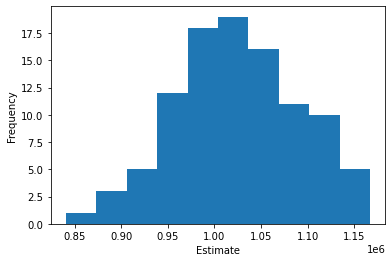

In [95]:
#Histogram takes 100 random tracks, takes the average of all their streams, then does this 100 times
#Is a standarrd deviation


from scipy.stats import normaltest
from numpy.random import seed
from numpy.random import randn


alpha = 0.05
data = []
for i in range(0,100):
    data.append(np.mean(df['streams'].sample(n=100)))
plt.hist(data)
plt.xlabel("Estimate")
plt.ylabel("Frequency")


Our goal is to determine if there certain values of song properties that result in extremely high or low success.
We create a dataframe that only saves the entry of a song at its peak stream count in the Top 200, meaning
we are comparing all the peaks.

In [ ]:
# Creating version of table with no duplicates, keeping the last seen version of each song. It is a fair representation of success.

no_dupes_df = df.copy()
no_dupes_df = no_dupes_df.sort_values('streams', ascending=False).drop_duplicates(['artist', 'duration_ms', 'acousticness', 'danceability', 'energy'], keep='first') 

Streams in relation to Song Duration

Text(0, 0.5, 'streams in millions')

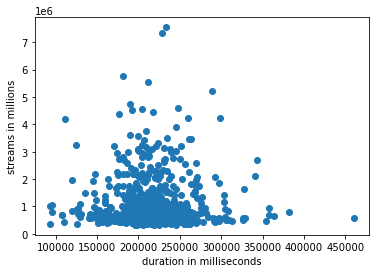

In [98]:
plt.scatter(no_dupes_df['duration_ms'], no_dupes_df['streams'])
plt.xlabel('duration in milliseconds')
plt.ylabel('streams in millions')

Streams in relation to Acousticness

Text(0, 0.5, 'streams in millions')

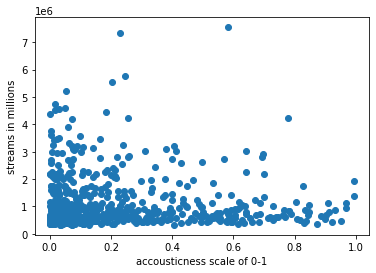

In [85]:
plt.scatter(no_dupes_df['acousticness'],no_dupes_df['streams'])
plt.xlabel('acousticness scale of 0-1')
plt.ylabel('streams in millions')

Streams in relation to Dancability

In [ ]:
plt.scatter(no_dupes_df['danceability'],no_dupes_df['streams'])
plt.xlabel('danceability scale of 0-1')
plt.ylabel('streams in millions')

Streams in relation to Energy

Text(0, 0.5, 'streams in millions')

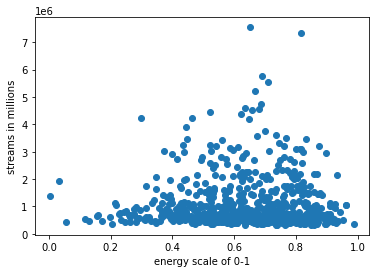

In [86]:
plt.scatter(no_dupes_df['energy'],no_dupes_df['streams'])
plt.xlabel('energy scale of 0-1')
plt.ylabel('streams in millions')

Streams in relation to Instrumentalness

Text(0, 0.5, 'streams in millions')

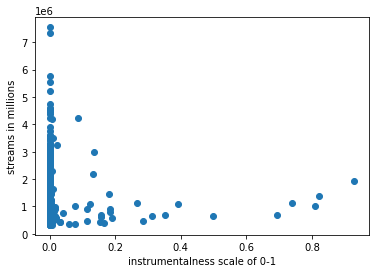

In [87]:
plt.scatter(no_dupes_df['instrumentalness'],no_dupes_df['streams'])
plt.xlabel('instrumentalness scale of 0-1')
plt.ylabel('streams in millions')

Streams in relation to liveness

Text(0, 0.5, 'streams in millions')

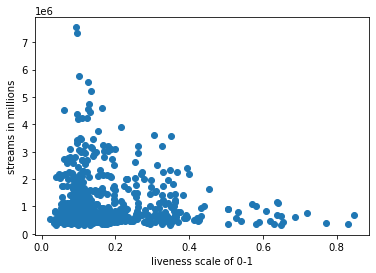

In [88]:
plt.scatter(no_dupes_df['liveness'],no_dupes_df['streams'])
plt.xlabel('liveness scale of 0-1') 
plt.ylabel('streams in millions')

Streams in relation to Loudness

Text(0, 0.5, 'streams in millions')

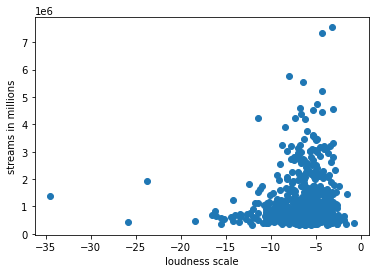

In [91]:
plt.scatter(no_dupes_df['loudness'],no_dupes_df['streams'])
plt.xlabel('loudness scale')
plt.ylabel('streams in millions')

Streams in relation to Speechiness

Text(0, 0.5, 'streams in millions')

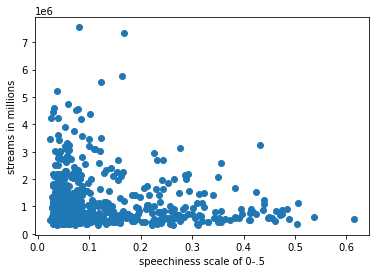

In [90]:
plt.scatter(no_dupes_df['speechiness'], no_dupes_df['streams'])
plt.xlabel('speechiness scale of 0-.5')
plt.ylabel('streams in millions')

In [ ]:
Streams in relation to Valence

Text(0, 0.5, 'streams in millions')

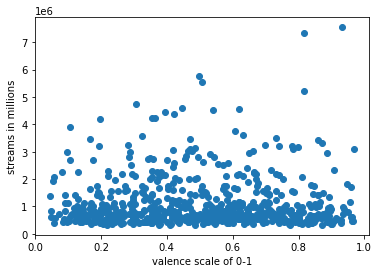

In [92]:
plt.scatter(no_dupes_df['valence'],no_dupes_df['streams'])
plt.xlabel('valence scale of 0-1')
plt.ylabel('streams in millions')

Streams in relation to Tempo

Text(0, 0.5, 'streams in millions')

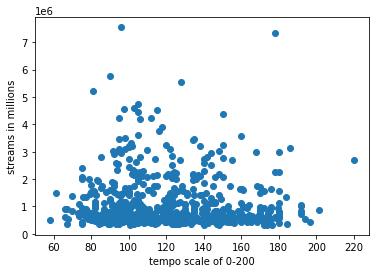

In [93]:
plt.scatter(no_dupes_df['tempo'],no_dupes_df['streams'])
plt.xlabel('tempo scale of 0-200')
plt.ylabel('streams in millions')

### Top 5
Here we observe the traits of specifically the song at the ranks 1-5. This song is likely to change, so there will be different values for the same position at times.

In [44]:
top5s = df.loc[df['position'] <= 5]
top5s.head()

,index,position,track_name,artist,streams,url,date,track_id,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_id
0,1,1,Starboy,The Weeknd,3135625.0,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-01,7MXVkk9YMctZqd1Srtv4MB,230453.0,0.14100,0.679,0.587,0.000006,0.137,-7.015,0.2760,0.486,186.003,1Xyo4u8uXC1ZmMpatF05PJ
1,2,2,Closer,The Chainsmokers,3015525.0,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-01,7BKLCZ1jbUBVqRi2FVlTVw,244960.0,0.41400,0.748,0.524,0.000000,0.111,-5.599,0.0338,0.661,95.010,69GGBxA162lTqCwzJG5jLp
2,3,3,Let Me Love You,DJ Snake,2545384.0,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-01,3ibKnFDaa3GhpPGlOUj7ff,256733.0,0.23500,0.656,0.578,0.000000,0.118,-8.970,0.0922,0.556,94.514,20s0P9QLxGqKuCsGwFsp7w
3,4,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604.0,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01,5knuzwU65gJK7IF5yJsuaW,251088.0,0.40600,0.720,0.763,0.000000,0.180,-4.068,0.0523,0.742,101.965,6MDME20pz9RveH9rEXvrOM
4,5,5,One Dance,Drake,2259887.0,https://open.spotify.com/track/1xznGGDReH1oQq0...,2017-01-01,1zi7xx7UVEFkmKfv06H8x0,173987.0,0.00776,0.792,0.625,0.001800,0.329,-5.609,0.0536,0.370,103.967,3TVXtAsR1Inumwj472S9r4


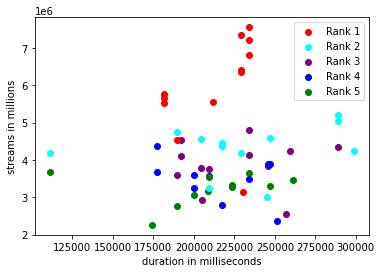

In [99]:
color_list = ['r', 'cyan', 'purple', 'b', 'green']

i = 0
for index, row in top5s.iterrows():
    plt.scatter(row['duration_ms'],row['streams'], color=color_list[i])
    i = (i + 1) % 5

plt.xlabel('duration in milliseconds')
plt.ylabel('streams in millions')
plt.legend(['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4', 'Rank 5'])


This graph Shows how the duration of a song in milliseconds compares to the number of streams that song received, and we're only using the first 10 pieces of data from our dataframe. This shows us that the songs with the most streams from this set of data are songs which are > 240000 ms, or 4 minutes. This is surprising, because the average song is usually around 3 minutes and 30 seconds or less.

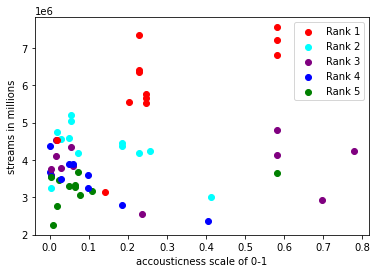

In [100]:
i = 0
for index, row in top5s.iterrows():
    plt.scatter(row['acousticness'],row['streams'], color=color_list[i])
    i = (i + 1) % 5

plt.xlabel('accousticness scale of 0-1')
plt.ylabel('streams in millions')
plt.legend(['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4', 'Rank 5'])

This graph displays a confidence score for how likely it is that a song is acoustic (with a value of 1 being very likely that the song is acoustic) compared to the number of streams the song has. All of the confidence scores are less than .5, which indicates most of these songs are probably not acoustic

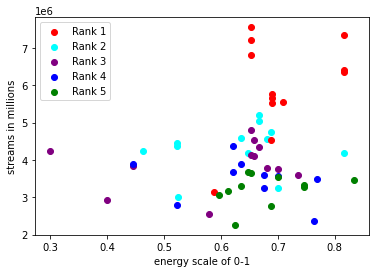

In [101]:
i = 0
for index, row in top5s.iterrows():
    plt.scatter(row['energy'],row['streams'], color=color_list[i])
    i = (i + 1) % 5

plt.xlabel('energy scale of 0-1')
plt.ylabel('streams in millions')
plt.legend(['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4', 'Rank 5'])

This graph shows how the "energy" of a song, or generally how noisy and fast the song is, compares to the number of streams for the top 10 songs on the 1st of January. Here, we see that the songs with the most streams are around or above .6 on the energy scale (a higher score means the song is higher energy)

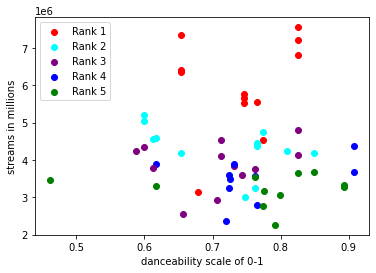

In [102]:
i = 0
for index, row in top5s.iterrows():
    plt.scatter(row['danceability'],row['streams'], color=color_list[i])
    i = (i + 1) % 5

plt.xlabel('danceability scale of 0-1')
plt.ylabel('streams in millions')
plt.legend(['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4', 'Rank 5'])


This graph shows how "danceable" a song is using a value provided to us by the Spotify API comapred to the number of streams that song got. Danceability is measured as a value from 0 to 1, where 1 is most danceable. This graph appears to be similar to the graph describing, so they may have been determined using similar characteristisc (i.e. both are measuring how upbeat or fast a song is)

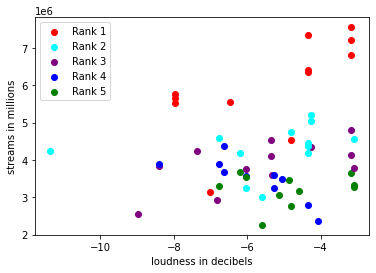

In [103]:
i = 0
for index, row in top5s.iterrows():
    plt.scatter(row['loudness'],row['streams'], color=color_list[i])
    i = (i + 1) % 5

plt.xlabel('loudness in decibels')
plt.ylabel('streams in millions')
plt.legend(['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4', 'Rank 5'])


This graph describes the average volume of each track in our top 5s data set compared to the number of streams each song had. It appears to trend similarly to the last two graphs, indicating that the volume of a track may be correlated with how danceable or energetic a song is.

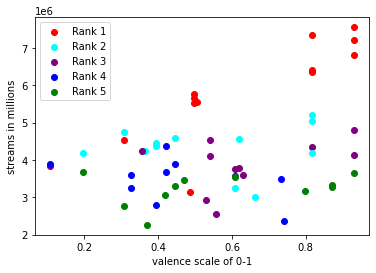

In [104]:
i = 0
for index, row in top5s.iterrows():
    plt.scatter(row['valence'],row['streams'], color=color_list[i])
    i = (i + 1) % 5

plt.xlabel('valence scale of 0-1')
plt.ylabel('streams in millions')
plt.legend(['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4', 'Rank 5'])


This graph describes the "valence" of a song compared to the # of streams it got. Valence is described as the "positivity" of a song where "Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)," according to the Spotify API reference. The reference does not describe how this value is determined, but our data seems to show there may be a correlation between valence and the number of streams a song is getting in the set of number 1 songs. However, this graph does not take into account the other features for the songs. It may be worth trying to consider songs where features except for this one are held to a constant, so that we can consider if there is a correlation between this value and the number of streams.

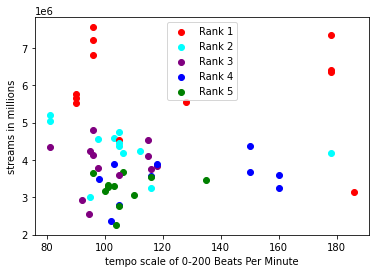

In [105]:
i = 0
for index, row in top5s.iterrows():
    plt.scatter(row['tempo'],row['streams'], color=color_list[i])
    i = (i + 1) % 5

plt.xlabel('tempo scale of 0-200 Beats Per Minute')
plt.ylabel('streams in millions')
plt.legend(['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4', 'Rank 5'])


This graph describes the tempo of a song comapred to the number of streams that song has. Given our dataset, it is unclear whether there is a correlation between the tempo of a song and the number of streams it gets.

There appeared to be a potential relationship between valence and the number of streams a song was getting, so it might be interesting to look at what the different features are like for songs with a valence of around .4 or higher

In [52]:
highValenceTopTracks = top5s.loc[top5s['valence'] > .4]
highValenceTopTracks.sort_values('streams', ascending=False).head(10)

,index,position,track_name,artist,streams,url,date,track_id,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_id
200,1,1,Shape of You,Ed Sheeran,7549041.0,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-02-01,7qiZfU4dY1lWllzX7mPBI3,233713.0,0.581,0.825,0.652,0.000000,0.0931,-3.183,0.0802,0.931,95.977,6eUKZXaKkcviH0Ku9w2n3V
1000,1,1,Despacito - Remix,Luis Fonsi,7332260.0,https://open.spotify.com/track/5CtI0qwDJkDQGwX...,2017-06-01,6rPO02ozF3bM7NnOV4h6s2,228827.0,0.228,0.653,0.816,0.000000,0.0967,-4.353,0.1670,0.816,178.085,4V8Sr092TqfHkfAA5fXXqG
400,1,1,Shape of You,Ed Sheeran,7201132.0,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-03-01,7qiZfU4dY1lWllzX7mPBI3,233713.0,0.581,0.825,0.652,0.000000,0.0931,-3.183,0.0802,0.931,95.977,6eUKZXaKkcviH0Ku9w2n3V
600,1,1,Shape of You,Ed Sheeran,6815498.0,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-04-01,7qiZfU4dY1lWllzX7mPBI3,233713.0,0.581,0.825,0.652,0.000000,0.0931,-3.183,0.0802,0.931,95.977,6eUKZXaKkcviH0Ku9w2n3V
1200,1,1,Despacito - Remix,Luis Fonsi,6398530.0,https://open.spotify.com/track/5CtI0qwDJkDQGwX...,2017-07-01,6rPO02ozF3bM7NnOV4h6s2,228827.0,0.228,0.653,0.816,0.000000,0.0967,-4.353,0.1670,0.816,178.085,4V8Sr092TqfHkfAA5fXXqG
800,1,1,Despacito - Remix,Luis Fonsi,6360737.0,https://open.spotify.com/track/5CtI0qwDJkDQGwX...,2017-05-01,6rPO02ozF3bM7NnOV4h6s2,228827.0,0.228,0.653,0.816,0.000000,0.0967,-4.353,0.1670,0.816,178.085,4V8Sr092TqfHkfAA5fXXqG
2000,1,1,rockstar,Post Malone,5755610.0,https://open.spotify.com/track/7wGoVu4Dady5GV0...,2017-11-01,7ytR5pFWmSjzHJIeQkgog4,181733.0,0.247,0.746,0.690,0.000000,0.1010,-7.956,0.1640,0.497,89.977,4r63FhuTkUYltbVAg5TQnk
1800,1,1,rockstar,Post Malone,5649503.0,https://open.spotify.com/track/1OmcAT5Y8eg5bUP...,2017-10-01,7ytR5pFWmSjzHJIeQkgog4,181733.0,0.247,0.746,0.690,0.000000,0.1010,-7.956,0.1640,0.497,89.977,4r63FhuTkUYltbVAg5TQnk
1600,1,1,Look What You Made Me Do,Taylor Swift,5547962.0,https://open.spotify.com/track/6uFsE1JgZ20EXyU...,2017-09-01,1P17dC1amhFzptugyAO7Il,211853.0,0.204,0.766,0.709,0.000014,0.1260,-6.471,0.1230,0.506,128.070,06HL4z0CvFAxyc27GXpf02
2200,1,1,rockstar,Post Malone,5528701.0,https://open.spotify.com/track/7wGoVu4Dady5GV0...,2017-12-01,7ytR5pFWmSjzHJIeQkgog4,181733.0,0.247,0.746,0.690,0.000000,0.1010,-7.956,0.1640,0.497,89.977,4r63FhuTkUYltbVAg5TQnk


We have duplicate pieces of data, so lets remove the duplicates for this test. We're going to try to keep the versions of the song that have the most streams

In [53]:
highValenceTopTracks = highValenceTopTracks.sort_values('streams', ascending=False).drop_duplicates(['artist', 'duration_ms', 'acousticness', 'danceability', 'energy'], keep='first') # Keeping the last seen version of each song, as that will probably hold it's total streams more accurately
highValenceTopTracks.sort_values('streams', ascending=False).head(10)

,index,position,track_name,artist,streams,url,date,track_id,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_id
200,1,1,Shape of You,Ed Sheeran,7549041.0,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-02-01,7qiZfU4dY1lWllzX7mPBI3,233713.0,0.581000,0.825,0.652,0.000000,0.0931,-3.183,0.0802,0.931,95.977,6eUKZXaKkcviH0Ku9w2n3V
1000,1,1,Despacito - Remix,Luis Fonsi,7332260.0,https://open.spotify.com/track/5CtI0qwDJkDQGwX...,2017-06-01,6rPO02ozF3bM7NnOV4h6s2,228827.0,0.228000,0.653,0.816,0.000000,0.0967,-4.353,0.1670,0.816,178.085,4V8Sr092TqfHkfAA5fXXqG
2000,1,1,rockstar,Post Malone,5755610.0,https://open.spotify.com/track/7wGoVu4Dady5GV0...,2017-11-01,7ytR5pFWmSjzHJIeQkgog4,181733.0,0.247000,0.746,0.690,0.000000,0.1010,-7.956,0.1640,0.497,89.977,4r63FhuTkUYltbVAg5TQnk
1600,1,1,Look What You Made Me Do,Taylor Swift,5547962.0,https://open.spotify.com/track/6uFsE1JgZ20EXyU...,2017-09-01,1P17dC1amhFzptugyAO7Il,211853.0,0.204000,0.766,0.709,0.000014,0.1260,-6.471,0.1230,0.506,128.070,06HL4z0CvFAxyc27GXpf02
1001,2,2,I'm the One,DJ Khaled,5208996.0,https://open.spotify.com/track/72Q0FQQo32KJloi...,2017-06-01,1jYiIOC5d6soxkJP81fxq2,288877.0,0.053300,0.599,0.667,0.000000,0.1340,-4.267,0.0367,0.817,80.984,0QHgL1lAIqAw0HtD7YldmP
401,2,2,Something Just Like This,The Chainsmokers,4581789.0,https://open.spotify.com/track/6RUKPb4LETWmmr3...,2017-03-01,6RUKPb4LETWmmr3iAEQktW,247160.0,0.049800,0.617,0.635,0.000014,0.1640,-6.769,0.0317,0.446,103.019,69GGBxA162lTqCwzJG5jLp
1201,2,2,Wild Thoughts (feat. Rihanna & Bryson Tiller),DJ Khaled,4558126.0,https://open.spotify.com/track/1OAh8uOEOvTDqkK...,2017-07-01,45XhKYRRkyeqoW3teSOkCM,204664.0,0.028700,0.613,0.681,0.000000,0.1260,-3.089,0.0778,0.619,97.621,0QHgL1lAIqAw0HtD7YldmP
402,3,3,It Ain't Me (with Selena Gomez),Kygo,4529714.0,https://open.spotify.com/track/3eR23VReFzcdmS7...,2017-03-01,2jRGYG8U5bJzWOH6FLuzvO,192000.0,0.016100,0.713,0.658,0.000138,0.0607,-5.362,0.0748,0.539,115.024,23fqKkggKUBHNkbKtXEls4
803,4,4,HUMBLE.,Kendrick Lamar,4371886.0,https://open.spotify.com/track/7KXjTSCq5nL1LoY...,2017-05-01,7KXjTSCq5nL1LoYtL7XAwS,177000.0,0.000282,0.908,0.621,0.000054,0.0958,-6.638,0.1020,0.421,150.011,2YZyLoL8N0Wb9xBt1NhZWg
2002,3,3,New Rules,Dua Lipa,3758506.0,https://open.spotify.com/track/2ekn2ttSfGqwhha...,2017-11-01,2ekn2ttSfGqwhhate0LSR0,209320.0,0.002610,0.762,0.700,0.000016,0.1530,-6.021,0.0694,0.608,116.073,6M2wZ9GZgrQXHCFfjv46we


In [54]:
highValenceTopTracks = highValenceTopTracks.sort_values('valence', ascending=False)
highValenceTopTracks.head()

,index,position,track_name,artist,streams,url,date,track_id,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_id
200,1,1,Shape of You,Ed Sheeran,7549041.0,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-02-01,7qiZfU4dY1lWllzX7mPBI3,233713.0,0.5810,0.825,0.652,0.000000,0.0931,-3.183,0.0802,0.931,95.977,6eUKZXaKkcviH0Ku9w2n3V
1604,5,5,"Feels (feat. Pharrell Williams, Katy Perry & B...",Calvin Harris,3324451.0,https://open.spotify.com/track/5bcTCxgc7xVfSaM...,2017-09-01,5bcTCxgc7xVfSaMV3RuVke,223413.0,0.0642,0.893,0.745,0.000000,0.0943,-3.105,0.0571,0.872,101.018,7CajNmpbOovFoOoasH2HaY
1001,2,2,I'm the One,DJ Khaled,5208996.0,https://open.spotify.com/track/72Q0FQQo32KJloi...,2017-06-01,1jYiIOC5d6soxkJP81fxq2,288877.0,0.0533,0.599,0.667,0.000000,0.1340,-4.267,0.0367,0.817,80.984,0QHgL1lAIqAw0HtD7YldmP
1000,1,1,Despacito - Remix,Luis Fonsi,7332260.0,https://open.spotify.com/track/5CtI0qwDJkDQGwX...,2017-06-01,6rPO02ozF3bM7NnOV4h6s2,228827.0,0.2280,0.653,0.816,0.000000,0.0967,-4.353,0.1670,0.816,178.085,4V8Sr092TqfHkfAA5fXXqG
1004,5,5,Attention,Charlie Puth,3169966.0,https://open.spotify.com/track/4iLqG9SeJSnt0cS...,2017-06-01,5cF0dROlMOK5uNZtivgu50,208787.0,0.1090,0.775,0.613,0.000023,0.1340,-4.586,0.0542,0.797,100.066,6VuMaDnrHyPL1p4EHjYLi7


We believe no one feature has a strong effect on the number of streams, but it's possible that a combination of values in different features work together to improve stream count.

Using our list of songs with a high valence, we can look at the relationship between featuers like danceability or tempo and stream count to try to see how songs with both a high valence and varying levels of these features affect streams.

Let's get high valence songs from our original dataframe to have a larger sample size

In [55]:
highValenceTracks = df.loc[(df['valence'] > .5) & (df['valence'] < .8)]
veryHighValenceTracks = df.loc[df['valence'] > .8]
lowValenceTracks = df.loc[(df['valence'] < .5) & (df['valence'] > .3)]
veryLowValenceTracks = df.loc[df['valence'] < .3]
#lowValenceTracks.head()
#highValenceTracks.head()

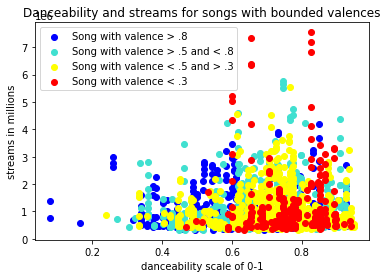

In [56]:
# Plotting songs with a high valence and varying levels of danceability against streams to see if these two values work together to impact stream counts
plt.scatter(veryLowValenceTracks['danceability'],veryLowValenceTracks['streams'], color="blue")
plt.scatter(lowValenceTracks['danceability'],lowValenceTracks['streams'], color="turquoise")
plt.scatter(highValenceTracks['danceability'],highValenceTracks['streams'], color="yellow")
plt.scatter(veryHighValenceTracks['danceability'],veryHighValenceTracks['streams'], color="red")
plt.title('Danceability and streams for songs with bounded valences')
plt.xlabel('danceability scale of 0-1')
plt.ylabel('streams in millions')
plt.legend(['Song with valence > .8', 'Song with valence > .5 and < .8', 'Song with valence < .5 and > .3', 'Song with valence < .3'])

This graph displays how the danceability of a song compares to the number of streams it has for songs that have a high valence (>.5). While there is little indication of a linear correlation, it appears that the songs with the most streams all also have a danceability of > .5. 

No longer seeing the relationship we were seeing earlier between valence and number of streams. Maybe the relationship that leads to more streams is a combination of these features together. It might be worth trying to see if there is a relationship between streams and a combination of features like valence AND loudness or tempo AND danceability

Instead of considering high valence songs, let's looks at the top streamed songs for the 1st day of every month in the year of 2017

In [57]:
top500OverYear = df.sort_values('streams', ascending=False).drop_duplicates(['artist', 'duration_ms', 'acousticness', 'danceability', 'energy'], keep='first').head(500)
top500OverYear.head(20)

,index,position,track_name,artist,streams,url,date,track_id,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_id
200,1,1,Shape of You,Ed Sheeran,7549041.0,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-02-01,7qiZfU4dY1lWllzX7mPBI3,233713.0,0.581000,0.825,0.652,0.000000,0.0931,-3.183,0.0802,0.931,95.977,6eUKZXaKkcviH0Ku9w2n3V
1000,1,1,Despacito - Remix,Luis Fonsi,7332260.0,https://open.spotify.com/track/5CtI0qwDJkDQGwX...,2017-06-01,6rPO02ozF3bM7NnOV4h6s2,228827.0,0.228000,0.653,0.816,0.000000,0.0967,-4.353,0.1670,0.816,178.085,4V8Sr092TqfHkfAA5fXXqG
2000,1,1,rockstar,Post Malone,5755610.0,https://open.spotify.com/track/7wGoVu4Dady5GV0...,2017-11-01,7ytR5pFWmSjzHJIeQkgog4,181733.0,0.247000,0.746,0.690,0.000000,0.1010,-7.956,0.1640,0.497,89.977,4r63FhuTkUYltbVAg5TQnk
1600,1,1,Look What You Made Me Do,Taylor Swift,5547962.0,https://open.spotify.com/track/6uFsE1JgZ20EXyU...,2017-09-01,1P17dC1amhFzptugyAO7Il,211853.0,0.204000,0.766,0.709,0.000014,0.1260,-6.471,0.1230,0.506,128.070,06HL4z0CvFAxyc27GXpf02
1001,2,2,I'm the One,DJ Khaled,5208996.0,https://open.spotify.com/track/72Q0FQQo32KJloi...,2017-06-01,1jYiIOC5d6soxkJP81fxq2,288877.0,0.053300,0.599,0.667,0.000000,0.1340,-4.267,0.0367,0.817,80.984,0QHgL1lAIqAw0HtD7YldmP
1601,2,2,Mi Gente,J Balvin,4756176.0,https://open.spotify.com/track/2rb5MvYT7ZIxbKW...,2017-09-01,4ipnJyDU3Lq15qBAYNqlqK,189440.0,0.017900,0.774,0.687,0.000012,0.1280,-4.818,0.0584,0.308,104.959,1vyhD5VmyZ7KMfW5gqLgo5
401,2,2,Something Just Like This,The Chainsmokers,4581789.0,https://open.spotify.com/track/6RUKPb4LETWmmr3...,2017-03-01,6RUKPb4LETWmmr3iAEQktW,247160.0,0.049800,0.617,0.635,0.000014,0.1640,-6.769,0.0317,0.446,103.019,69GGBxA162lTqCwzJG5jLp
1201,2,2,Wild Thoughts (feat. Rihanna & Bryson Tiller),DJ Khaled,4558126.0,https://open.spotify.com/track/1OAh8uOEOvTDqkK...,2017-07-01,45XhKYRRkyeqoW3teSOkCM,204664.0,0.028700,0.613,0.681,0.000000,0.1260,-3.089,0.0778,0.619,97.621,0QHgL1lAIqAw0HtD7YldmP
402,3,3,It Ain't Me (with Selena Gomez),Kygo,4529714.0,https://open.spotify.com/track/3eR23VReFzcdmS7...,2017-03-01,2jRGYG8U5bJzWOH6FLuzvO,192000.0,0.016100,0.713,0.658,0.000138,0.0607,-5.362,0.0748,0.539,115.024,23fqKkggKUBHNkbKtXEls4
2001,2,2,Havana,Camila Cabello,4438592.0,https://open.spotify.com/track/0ofbQMrRDsUaVKq...,2017-11-01,1rfofaqEpACxVEHIZBJe6W,217307.0,0.184000,0.765,0.523,0.000036,0.1320,-4.333,0.0300,0.394,104.988,4nDoRrQiYLoBzwC5BhVJzF


In [107]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# plt.scatter(top500OverYear['valence'], top500OverYear['tempo'], top500OverYear['streams'])
# plt.xlabel('energy scale of 0-1')
# plt.ylabel('streams in millions')

<AxesSubplot:>

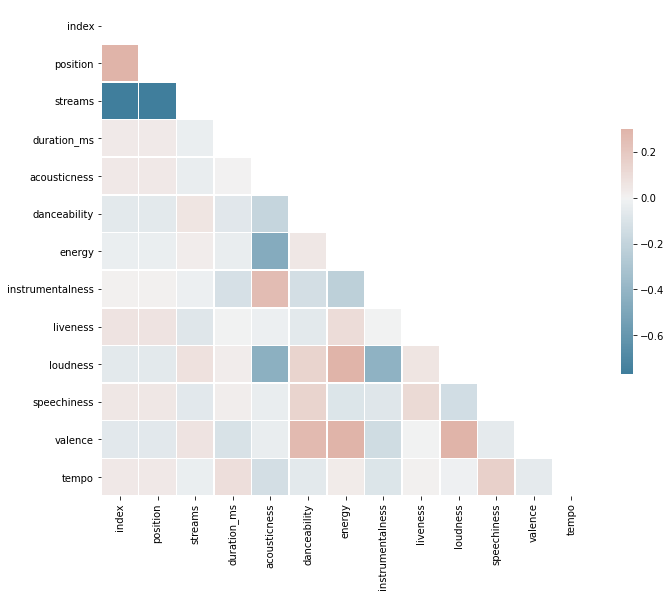

In [59]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

It seems like each individual feature has very little effect on the number of streams, which would support our findings above. After seeing this, we had a couple of ideas. It is possible different features we are currently tracking work together to make a song popular, but it is also possible we are missing other important features. After looking back at the most popular songs over the course of our entire dataframe, we noticed the majority of artists were well known or already accomplished. While it is obvious that an artists "followers" or typical listeners will increase the number of streams a song will get, it would be interesting to know if the number of typical listeners was more important than all these other aspects of the song.

We can start by getting the number of followers each artist has for every track entry in our dataframe. The Spotify API also provides a "popularity" index from 0 to 100, with 100 being the most popular. We will get this information, as well. There will be repetition between duplicate entries for an artist, but we are keeping these in so that we can still build a dataframe.

In [61]:
#Popularity and follower count computed at the beginning
df['popularity value']
df['number of artist followers']
df.head()

,index,position,track_name,artist,streams,url,date,track_id,duration_ms,acousticness,...,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_id,number of artist followers,popularity value
0,1,1,Starboy,The Weeknd,3135625.0,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-01,7MXVkk9YMctZqd1Srtv4MB,230453.0,0.14100,...,0.587,0.000006,0.137,-7.015,0.2760,0.486,186.003,1Xyo4u8uXC1ZmMpatF05PJ,26720759.0,94.0
1,2,2,Closer,The Chainsmokers,3015525.0,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-01,7BKLCZ1jbUBVqRi2FVlTVw,244960.0,0.41400,...,0.524,0.000000,0.111,-5.599,0.0338,0.661,95.010,69GGBxA162lTqCwzJG5jLp,17093912.0,84.0
2,3,3,Let Me Love You,DJ Snake,2545384.0,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-01,3ibKnFDaa3GhpPGlOUj7ff,256733.0,0.23500,...,0.578,0.000000,0.118,-8.970,0.0922,0.556,94.514,20s0P9QLxGqKuCsGwFsp7w,2055274.0,69.0
3,4,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604.0,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01,5knuzwU65gJK7IF5yJsuaW,251088.0,0.40600,...,0.763,0.000000,0.180,-4.068,0.0523,0.742,101.965,6MDME20pz9RveH9rEXvrOM,4092589.0,80.0
4,5,5,One Dance,Drake,2259887.0,https://open.spotify.com/track/1xznGGDReH1oQq0...,2017-01-01,1zi7xx7UVEFkmKfv06H8x0,173987.0,0.00776,...,0.625,0.001800,0.329,-5.609,0.0536,0.370,103.967,3TVXtAsR1Inumwj472S9r4,51374698.0,96.0


Recall that we have saved a dataframe with no duplicates.

In [84]:
no_dupes_df.head(5)

,index,position,track_name,artist,streams,url,date,track_id,duration_ms,acousticness,...,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_id,number of artist followers,popularity value
200,1,1,Shape of You,Ed Sheeran,7549041.0,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-02-01,7qiZfU4dY1lWllzX7mPBI3,233713.0,0.5810,...,0.652,0.000000,0.0931,-3.183,0.0802,0.931,95.977,6eUKZXaKkcviH0Ku9w2n3V,73345259.0,91.0
1000,1,1,Despacito - Remix,Luis Fonsi,7332260.0,https://open.spotify.com/track/5CtI0qwDJkDQGwX...,2017-06-01,6rPO02ozF3bM7NnOV4h6s2,228827.0,0.2280,...,0.816,0.000000,0.0967,-4.353,0.1670,0.816,178.085,4V8Sr092TqfHkfAA5fXXqG,9035487.0,78.0
2000,1,1,rockstar,Post Malone,5755610.0,https://open.spotify.com/track/7wGoVu4Dady5GV0...,2017-11-01,7ytR5pFWmSjzHJIeQkgog4,181733.0,0.2470,...,0.690,0.000000,0.1010,-7.956,0.1640,0.497,89.977,4r63FhuTkUYltbVAg5TQnk,5174251.0,93.0
1600,1,1,Look What You Made Me Do,Taylor Swift,5547962.0,https://open.spotify.com/track/6uFsE1JgZ20EXyU...,2017-09-01,1P17dC1amhFzptugyAO7Il,211853.0,0.2040,...,0.709,0.000014,0.1260,-6.471,0.1230,0.506,128.070,06HL4z0CvFAxyc27GXpf02,34579892.0,97.0
1001,2,2,I'm the One,DJ Khaled,5208996.0,https://open.spotify.com/track/72Q0FQQo32KJloi...,2017-06-01,1jYiIOC5d6soxkJP81fxq2,288877.0,0.0533,...,0.667,0.000000,0.1340,-4.267,0.0367,0.817,80.984,0QHgL1lAIqAw0HtD7YldmP,5405048.0,82.0


Let's look at the popularities plotted against the number of streams a song has

Text(0, 0.5, 'Streams in millions')

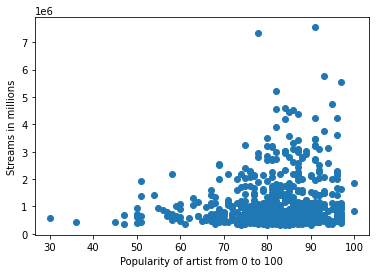

In [83]:
plt.scatter(no_dupes_df['popularity value'], no_dupes_df['streams'])
plt.xlabel("Popularity of artist from 0 to 100")
plt.ylabel("Streams in millions")


There are artists in the top 5 positions that have relatively low popularity indices compared to other artists on the top 200 chart. Understanding how these artists got to these high positions given low popularity indices would be valuabe. Let's try to locate all of these top 200 tracks that came from artists with low popularity indices, and see if we can learn from that group.

In [65]:
# lowPopularityArtists = df.loc[df['popularity value'] < ] # Learning about songs on the top 200 chart with low artist popularity might help us understand what is actually important in trying to get a song on the top 200 chart

Text(0, 0.5, 'Streams in millions')

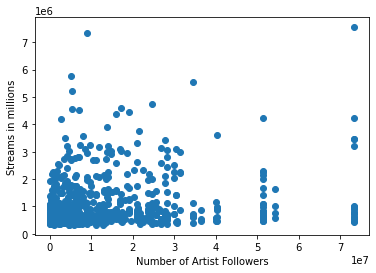

In [106]:
plt.scatter(no_dupes_df['number of artist followers'], no_dupes_df['streams'])
plt.xlabel("Number of Artist Followers")
plt.ylabel("Streams in millions")


In [108]:
# i = 0
# for index, row in top5s.iterrows():
#     plt.scatter(row['number of artist followers'],row['streams'], color=color_list[i])
#     i = (i + 1) % 5
# plt.xlabel('number of artist followers')
# plt.ylabel('streams in millions')
# plt.legend(['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4', 'Rank 5'])

KeyError: 'number of artist followers'

# Insight
Does popularity/followers make a difference?